In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [0]:
train_data = pd.read_csv('/content/mydrive/My Drive/Education/Train.csv')
test_data = pd.read_csv('/content/mydrive/My Drive/Education/Test.csv')

In [4]:
train_data[['current_date', 'current_time']]
test_data[['current_date', 'current_time']]

,current_date,current_time
0,2016-10-06,01:05:38 AM
1,2016-10-06,01:05:56 AM
2,2016-10-06,06:11:54 AM
3,2016-10-06,07:00:00 AM
4,2016-10-06,07:00:09 AM
...,...,...
959,2016-10-29,09:14:45 AM
960,2016-10-29,10:17:59 AM
961,2016-10-29,10:39:10 AM
962,2016-10-29,10:59:55 AM


In [0]:
train_data['current_datetime'] = pd.to_datetime(train_data['current_date']+' '+train_data['current_time'])
test_data['current_datetime'] = pd.to_datetime(test_data['current_date']+' '+test_data['current_time'])

In [0]:
train_data['high'] = np.where(train_data['target']=='high', 1, 0)
train_data['medium'] = np.where(train_data['target']=='medium', 1, 0)
train_data['low'] = np.where(train_data['target']=='low', 1, 0)

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(train_data['current_datetime'].values.reshape(-1, 1), train_data['high'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
clf.score(train_data['current_datetime'].values.reshape(-1, 1), train_data['high'])

0.9392523364485982

In [10]:
clf.predict(test_data['current_datetime'].values.reshape(-1, 1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

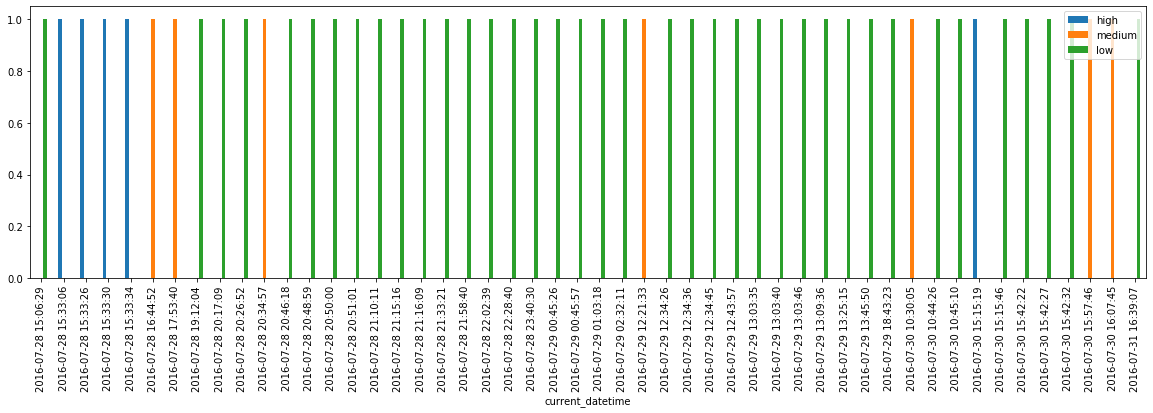

In [72]:
train_data.set_index('current_datetime', inplace=True)
train_data.iloc[50:100][['high', 'medium', 'low']].plot.bar(figsize=(20,5))

In [73]:
train_data[['high', 'medium', 'low']].sum().sum()

1284

In [57]:
train_data.shape

(1284, 22)